In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import ipywidgets as widgets
from IPython.display import display
from functools import cache

from pathlib import Path
%matplotlib widget
# %matplotlib inline
PATH = "d:checkpoints"


In [9]:
@cache
def load_image(img_file):
    return mpimg.imread(img_file)


interactive(children=(Dropdown(description='Image Dir:', options=('d:checkpoints\\StyleGan16x16\\1\\gen_images…

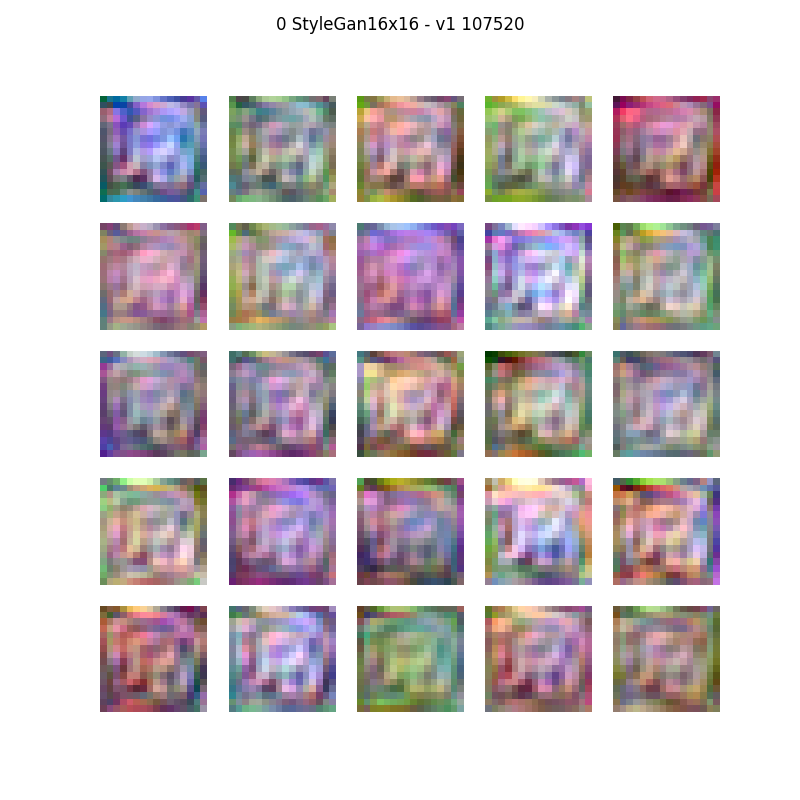

({'name': 'value', 'old': 'd:checkpoints\\StyleGan16x16\\1\\gen_images\\', 'new': 'd:checkpoints\\StyleGan32x32\\1\\gen_images\\', 'owner': Dropdown(description='Image Dir:', index=2, options=('d:checkpoints\\StyleGan16x16\\1\\gen_images\\', 'd:checkpoints\\StyleGan16x16\\2\\gen_images\\', 'd:checkpoints\\StyleGan32x32\\1\\gen_images\\', 'd:checkpoints\\StyleGan4x4\\1\\gen_images\\', 'd:checkpoints\\StyleGan4x4\\2\\gen_images\\', 'd:checkpoints\\StyleGan4x4\\3\\gen_images\\', 'd:checkpoints\\StyleGan4x4\\4\\gen_images\\', 'd:checkpoints\\StyleGan4x4\\5\\gen_images\\', 'd:checkpoints\\StyleGan4x4\\6\\gen_images\\', 'd:checkpoints\\StyleGan8x8\\1\\gen_images\\', 'd:checkpoints\\StyleGan8x8\\2\\gen_images\\'), value='d:checkpoints\\StyleGan32x32\\1\\gen_images\\'), 'type': 'change'},)


In [10]:

dir = list(glob(f'{PATH}/**/gen_images/', recursive=True))
dir.sort()
fig = plt.figure(figsize=(8,8))


img_file=widgets.Dropdown(options=dir, value=dir[0], description='Image Dir:')
step_slide=widgets.IntSlider(min=0, max=len(list(glob(f"{dir[0]}/*")))-1, step=1,value=0,continuous_update=True)
num_rows_slide=widgets.IntSlider(min=1, max=10, step=1,value=5,continuous_update=False)
num_cols_slide=widgets.IntSlider(min=1, max=10, step=1,value=5,continuous_update=False)
def on_update_folder(*args):
    print(args)
    folders = list(glob(f"{img_file.value}/*"))
    step_slide.max = len(folders)-1
img_file.observe(on_update_folder, 'value')

@widgets.interact(
                folders=img_file,
                num_rows=num_rows_slide,
                num_cols=num_cols_slide,
                step=step_slide
                )
def show(folders, num_rows = 10, num_cols = 10, step=0):
    fig.clear()
    folders = list(glob(f"{folders}/*"))
    folders.sort()
    fig.suptitle(f'{Path(folders[step]).parent.parent.parent.name} - v{Path(folders[step]).parent.parent.name} {Path(folders[step]).name}')
    images = list(glob(f'{folders[step]}/*.png'))
    for i, img_file in enumerate(images[:num_rows*num_cols]):
        fig.add_subplot(num_rows, num_cols, i+1)
        img = load_image(img_file)
        plt.imshow(img)
        plt.axis('off')
    # plt.show()





In [3]:
import random 
from torchvision import transforms
from PIL import Image
fig = plt.figure(figsize=(8,8))
images = glob(f'data/flowers-102/jpg/*.jpg')
random.shuffle(images)
@widgets.interact(
            step=widgets.IntSlider(
                min=0, max=8, step=1,
                value=0,
                continuous_update=False,
            ),
            num_rows=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
            num_cols=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
)
def show(num_rows = 10, num_cols = 10, step=0):
    fig.clear()
    fig.suptitle(f'real images')
    image_size = 4*2**(step)
    fig.suptitle(f'size {image_size} x {image_size}')
    resize = transforms.Resize((image_size, image_size))
    for i, img_file in enumerate(images[:num_rows*num_cols]):
        fig.add_subplot(num_rows, num_cols, i+1)
        img = Image.open(img_file)
        plt.imshow(resize(img))
        plt.axis('off')

<Figure size 800x800 with 0 Axes>

interactive(children=(IntSlider(value=5, continuous_update=False, description='num_rows', max=10, min=1), IntS…